In [16]:
import numpy as np
import pandas as pd

import tqdm

from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import datetime

import os

In [17]:
CIRCUIT_NAME = "monaco"
FIGURES_PATH = os.path.join("..", "figures", CIRCUIT_NAME)
TEAM_COLORS = {
    "Mercedes":"#00D2BE",
    "Custom":(22.6/255.0, 21.1/255.0, 29.0/255.0),
    "Mc Laren":"#FF8700",
    "Ferrari":"#DC0000",
    "Red Bull":"#0600EF",
    "Alpine":"#0090FF",
    "Aston Martin":"#006F62",
    "Haas":"#8c8c8c",
    "Williams":"#005AFF",
    "Alfa Romeo":"#900000",
    "AlphaTauri":"#2B4562",
}

In [18]:
if not os.path.exists(os.path.join("..", "figures")):
    os.mkdir(os.path.join("..", "figures"))
if not os.path.exists(FIGURES_PATH):
    os.mkdir(FIGURES_PATH)

In [19]:
df = pd.read_csv(f"../data/{CIRCUIT_NAME}.csv")
df

,frame,name,time,date,custom,tc,gear,brakes,team
0,133,callumtennant27,1:07.466,4144/2022,Yes,0,0,1,Mercedes
1,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull
2,140,cpauifc,1:07.519,2914/2022,Yes,1,1,1,Mercedes
3,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari
4,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull
...,...,...,...,...,...,...,...,...,...
49934,166920,Stoffern,1:13.088,24/1/2022,Yes,1,0,1,Red Bull
49935,166923,crazyfrenchl14,1:13.088,28/1/2022,Yes,0,0,1,Mercedes
49936,166927,retsu,1:13.088,12/2/2022,Yes,0,0,0,Red Bull
49937,166930,Rosta,1:13.088,15/5/2022,No,1,1,1,Mercedes


In [20]:
# Filters out rows with wrong time
df = df[(df.time.str.count(":") == 1) & (df.time.str.count("\\.") == 1) & (df.date.str.count("/") == 2)]
df = df[df.time.str.len() == 8]
df = df[(df.custom == "Yes") | (df.custom == "No")]
df

,frame,name,time,date,custom,tc,gear,brakes,team
1,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull
3,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari
4,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull
5,150,BrendonLeigh,1:07.632,30/1/2022,Yes,0,0,0,Ferrari
6,153,AlessioDiCap,1:07.661,2/2/2022,Yes,0,0,0,Williams
...,...,...,...,...,...,...,...,...,...
49934,166920,Stoffern,1:13.088,24/1/2022,Yes,1,0,1,Red Bull
49935,166923,crazyfrenchl14,1:13.088,28/1/2022,Yes,0,0,1,Mercedes
49936,166927,retsu,1:13.088,12/2/2022,Yes,0,0,0,Red Bull
49937,166930,Rosta,1:13.088,15/5/2022,No,1,1,1,Mercedes


In [21]:
# Remove errors in times
df = df[df["time"].str.split(".").str[1].str.len() == 3]
df = df[df["time"].str.split(".").str[0].str.len() == 4]
df

,frame,name,time,date,custom,tc,gear,brakes,team
1,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull
3,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari
4,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull
5,150,BrendonLeigh,1:07.632,30/1/2022,Yes,0,0,0,Ferrari
6,153,AlessioDiCap,1:07.661,2/2/2022,Yes,0,0,0,Williams
...,...,...,...,...,...,...,...,...,...
49934,166920,Stoffern,1:13.088,24/1/2022,Yes,1,0,1,Red Bull
49935,166923,crazyfrenchl14,1:13.088,28/1/2022,Yes,0,0,1,Mercedes
49936,166927,retsu,1:13.088,12/2/2022,Yes,0,0,0,Red Bull
49937,166930,Rosta,1:13.088,15/5/2022,No,1,1,1,Mercedes


In [22]:
# Time to seconds
df["time_s"] = df.apply(lambda x: 60 * int(x["time"].split(":")[0]) + int(x["time"].split(":")[1].split(".")[0]) + 0.001 * int(x["time"].split(".")[1]), axis=1)
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
1,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull,67.473
3,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari,67.532
4,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull,67.570
5,150,BrendonLeigh,1:07.632,30/1/2022,Yes,0,0,0,Ferrari,67.632
6,153,AlessioDiCap,1:07.661,2/2/2022,Yes,0,0,0,Williams,67.661
...,...,...,...,...,...,...,...,...,...,...
49934,166920,Stoffern,1:13.088,24/1/2022,Yes,1,0,1,Red Bull,73.088
49935,166923,crazyfrenchl14,1:13.088,28/1/2022,Yes,0,0,1,Mercedes,73.088
49936,166927,retsu,1:13.088,12/2/2022,Yes,0,0,0,Red Bull,73.088
49937,166930,Rosta,1:13.088,15/5/2022,No,1,1,1,Mercedes,73.088


In [23]:
# Sort by lap time and date
df = df.sort_values(by=["time_s", "date"], ascending=[True, False]).reset_index(drop=True)
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull,67.473
1,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari,67.532
2,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull,67.570
3,150,BrendonLeigh,1:07.632,30/1/2022,Yes,0,0,0,Ferrari,67.632
4,153,AlessioDiCap,1:07.661,2/2/2022,Yes,0,0,0,Williams,67.661
...,...,...,...,...,...,...,...,...,...,...
43436,61635,cnnr4a,2:12.115,9/12/2021,Yes,1,0,1,Haas,132.115
43437,61652,Iimmsecond,2:12.115,5/5/2022,Yes,1,0,1,Red Bull,132.115
43438,61662,MirkOo,2:12.115,23/9/2021,No,1,0,1,Williams,132.115
43439,61638,stillguns,2:12.115,17/9/2021,Yes,1,0,1,Red Bull,132.115


In [24]:
# Manual filter to filter out obvious mistakes in times
df = df[df["time_s"] <= 73.1]
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,136,BiueWiggie,1:07.473,14/5/2022,Yes,0,0,1,Red Bull,67.473
1,143,DaniBereznay,1:07.532,2/12/2022,Yes,0,0,0,Ferrari,67.532
2,146,Senyth,1:07.570,21/4/2022,Yes,0,0,1,Red Bull,67.570
3,150,BrendonLeigh,1:07.632,30/1/2022,Yes,0,0,0,Ferrari,67.632
4,153,AlessioDiCap,1:07.661,2/2/2022,Yes,0,0,0,Williams,67.661
...,...,...,...,...,...,...,...,...,...,...
43393,165580,Trab2005,1:13.089,19/12/2021,No,1,1,1,Red Bull,73.089
43394,165590,lakunoc,1:13.089,19/12/2021,No,1,0,1,Mercedes,73.089
43395,165603,Alil,1:13.089,15/4/2022,No,1,0,0,Red Bull,73.089
43396,165597,joniizockt,1:13.089,14/1/2022,No,1,1,0,Custom,73.089


In [25]:
def check_date(datestr):
    try:
        datetime.datetime.strptime(datestr, "%d/%m/%Y")
        return True
    except:
        return False

In [26]:
# Filters out dates with wrong formats '/x/xxxx', 'x//xxxx', or 'x/x/' or any of their combination
# correct date formatting for easy sorting
df = df[df.date.apply(check_date)]
pd.options.mode.chained_assignment = None
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,136,BiueWiggie,1:07.473,2022-05-14,Yes,0,0,1,Red Bull,67.473
1,143,DaniBereznay,1:07.532,2022-12-02,Yes,0,0,0,Ferrari,67.532
2,146,Senyth,1:07.570,2022-04-21,Yes,0,0,1,Red Bull,67.570
3,150,BrendonLeigh,1:07.632,2022-01-30,Yes,0,0,0,Ferrari,67.632
4,153,AlessioDiCap,1:07.661,2022-02-02,Yes,0,0,0,Williams,67.661
...,...,...,...,...,...,...,...,...,...,...
43393,165580,Trab2005,1:13.089,2021-12-19,No,1,1,1,Red Bull,73.089
43394,165590,lakunoc,1:13.089,2021-12-19,No,1,0,1,Mercedes,73.089
43395,165603,Alil,1:13.089,2022-04-15,No,1,0,0,Red Bull,73.089
43396,165597,joniizockt,1:13.089,2022-01-14,No,1,1,0,Custom,73.089


In [27]:
# Finally remove duplicate rows if left and reset index
df = df.drop_duplicates(subset=["name","time"]).reset_index()
df

,index,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,0,136,BiueWiggie,1:07.473,2022-05-14,Yes,0,0,1,Red Bull,67.473
1,1,143,DaniBereznay,1:07.532,2022-12-02,Yes,0,0,0,Ferrari,67.532
2,2,146,Senyth,1:07.570,2022-04-21,Yes,0,0,1,Red Bull,67.570
3,3,150,BrendonLeigh,1:07.632,2022-01-30,Yes,0,0,0,Ferrari,67.632
4,4,153,AlessioDiCap,1:07.661,2022-02-02,Yes,0,0,0,Williams,67.661
...,...,...,...,...,...,...,...,...,...,...,...
42364,43393,165580,Trab2005,1:13.089,2021-12-19,No,1,1,1,Red Bull,73.089
42365,43394,165590,lakunoc,1:13.089,2021-12-19,No,1,0,1,Mercedes,73.089
42366,43395,165603,Alil,1:13.089,2022-04-15,No,1,0,0,Red Bull,73.089
42367,43396,165597,joniizockt,1:13.089,2022-01-14,No,1,1,0,Custom,73.089


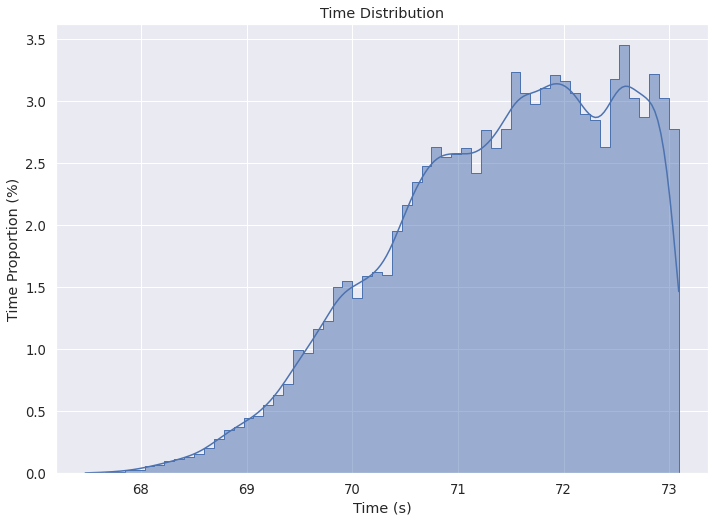

In [34]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.histplot(x="time_s", data=df, kde=True, color="b", element="step", stat="percent")
ax.set(xlabel="Time (s)", ylabel="Time Proportion (%)")
ax.set_title(f"Time Distribution")

plt.savefig(os.path.join(FIGURES_PATH, "time_dist.png"), bbox_inches="tight")
plt.show()

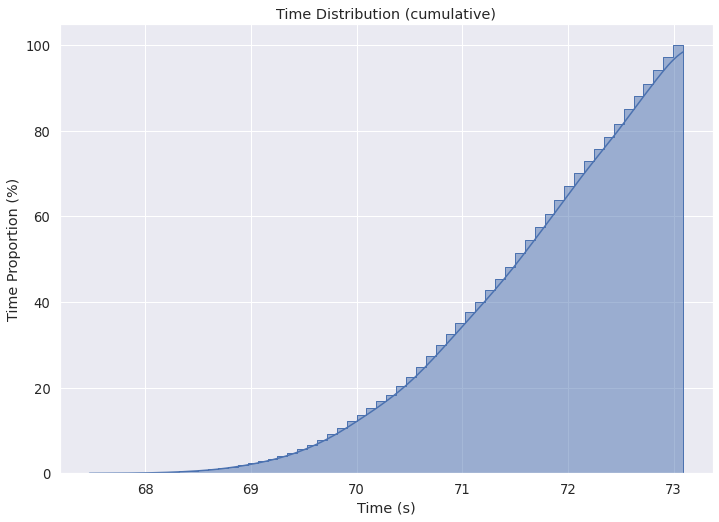

In [29]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.histplot(x="time_s", data=df, kde=True, color="b", element="step", stat="percent", cumulative=True)
ax.set(xlabel="Time (s)", ylabel="Time Proportion (%)")
ax.set_title(f"Time Distribution (cumulative)")
plt.savefig(os.path.join(FIGURES_PATH, "time_cumulative_dist.png"), bbox_inches="tight")
plt.show()

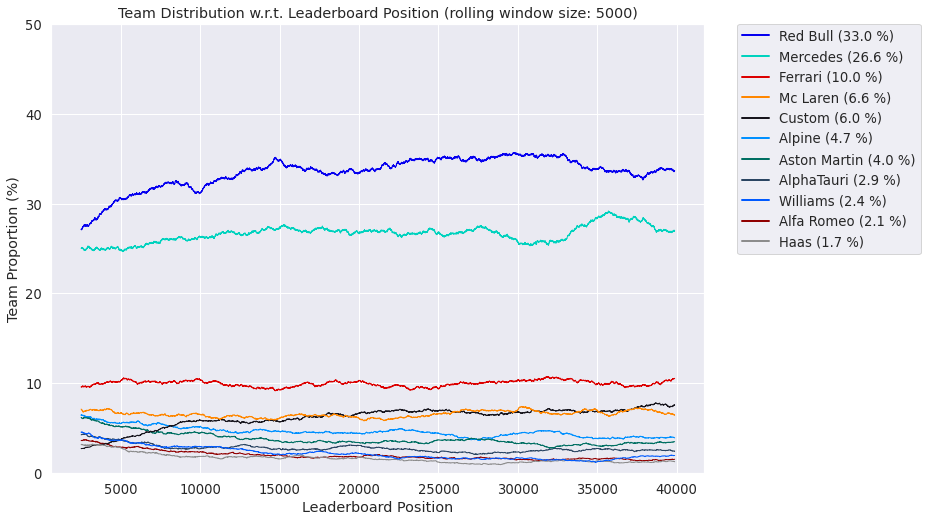

In [30]:
WINDOW_WIDTH = 5000
team_proportions = pd.get_dummies(df.team).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0


rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.lineplot(data=team_proportions, palette=TEAM_COLORS, dashes=False, markers=False, linewidth=1.0)
ax.set(xlabel="Leaderboard Position", ylabel="Team Proportion (%)")
ax.set_title(f"Team Distribution w.r.t. Leaderboard Position (rolling window size: {WINDOW_WIDTH})")

team_labels = []
team_counts = df.groupby("team").count().iloc[:,0]
team_sum = team_counts.sum()
teams_sorted = sorted(TEAM_COLORS.keys(), key= lambda x: team_counts[x], reverse=True)
for team in teams_sorted:
    team_labels.append(f"{team} ({team_counts[team] * 100.0 / team_sum:.1f} %)")

leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=team_labels)

for i, legobj in enumerate(leg.legendHandles):
    legobj.set_color(TEAM_COLORS[teams_sorted[i]])
    legobj.set_linewidth(2.0)

ax.set_ylim([0,50])
plt.savefig(os.path.join(FIGURES_PATH, "team_dist.png"), dpi=100, bbox_inches="tight")
plt.show()

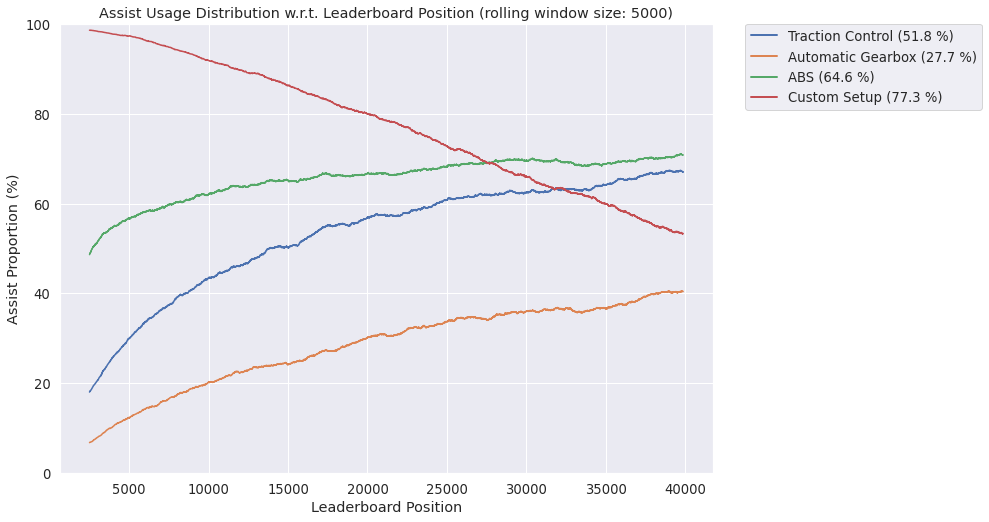

In [31]:
WINDOW_WIDTH = 5000

rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

tc = (pd.get_dummies(df.tc).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
gear = (pd.get_dummies(df.gear).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
brake = (pd.get_dummies(df.brakes).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
custom = (pd.get_dummies(df.custom).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)["Yes"]

proportions = pd.concat([tc,gear,brake,custom], axis=1)
proportions.columns = ["Traction Control", "Automatic", "ABS", "Custom Setup"]

ax = sns.lineplot(data=proportions, dashes=False, markers=False, linewidth=1.5)
ax.set(xlabel="Leaderboard Position", ylabel="Assist Proportion (%)")
ax.set_title(f"Assist Usage Distribution w.r.t. Leaderboard Position (rolling window size: {WINDOW_WIDTH})")

ax.set_ylim([0,100])

leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

teams_sorted = sorted(TEAM_COLORS.keys(), key= lambda x: team_counts[x], reverse=True)
    
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

assist_labels = [
    f"Traction Control ({df.tc.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"Automatic Gearbox ({df.gear.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"ABS ({df.brakes.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"Custom Setup ({df.groupby('custom').count().iloc[1,0] * 100.0 / df.shape[0]:.1f} %)",
]


leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=assist_labels)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

plt.savefig(os.path.join(FIGURES_PATH, "assist_dist.png"), dpi=100, bbox_inches="tight")
plt.show()

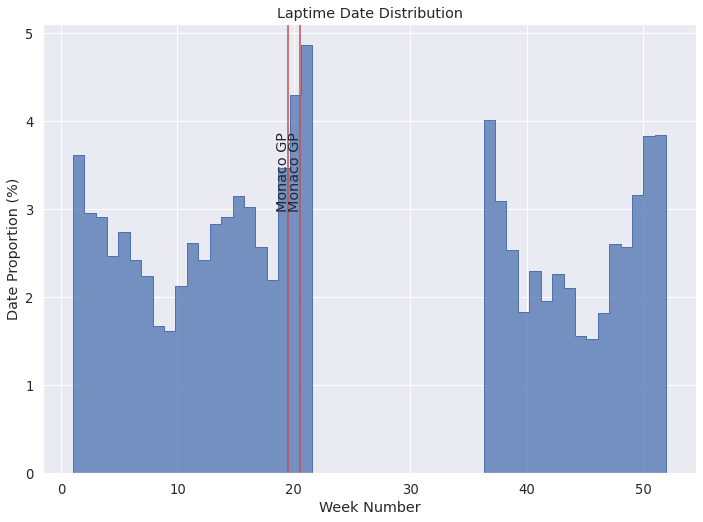

In [33]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

gp_weeks = [20, 21]

for gp_week in gp_weeks:
    plt.axvline(gp_week-0.5, color="r")
    plt.text(gp_week-1.5, 3,f"{CIRCUIT_NAME.capitalize()} GP", rotation=90)


df["week_num"] = df.date.apply(lambda x:  x.isocalendar()[1])
ax = sns.histplot(x="week_num", data=df, bins=52, element="step", stat="percent")
ax.set(xlabel="Week Number", ylabel="Date Proportion (%)")
ax.set_title(f"Laptime Date Distribution")

plt.savefig(os.path.join(FIGURES_PATH, "weekday_dist.png"), dpi=120, bbox_inches="tight")
plt.show()